In [8]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import math

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Importing  Data

In [17]:
list1 = pd.read_csv('listings.csv')
list2 = pd.read_csv('/Users/Jialin/Google Drive/Cornell courses/ORIE 4741/Project/Seattle/listings2.csv')
nbhd = pd.read_csv('/Users/Jialin/Google Drive/Cornell courses/ORIE 4741/Project/Seattle/neighbourhoods.csv')
calendar = pd.read_csv('/Users/Jialin/Google Drive/Cornell courses/ORIE 4741/Project/Seattle/calendar.csv')
review1 = pd.read_csv('/Users/Jialin/Google Drive/Cornell courses/ORIE 4741/Project/Seattle/reviews.csv')
review2 = pd.read_csv('/Users/Jialin/Google Drive/Cornell courses/ORIE 4741/Project/Seattle/reviews2.csv')


#  2. Data Exploratory Analysis

In [26]:
print(list1.columns.values)
print(list1.shape)

['id' 'name' 'host_id' 'host_name' 'neighbourhood_group' 'neighbourhood'
 'latitude' 'longitude' 'room_type' 'price' 'minimum_nights'
 'number_of_reviews' 'last_review' 'reviews_per_month'
 'calculated_host_listings_count' 'availability_365']
(3818, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,241032,Stylish Queen Anne Apartment,956883,NaN,Queen Anne,West Queen Anne,47.636289,-122.371025,Entire home/apt,85,1,207,2016-01-02,4.07,2,346
1,953595,Bright & Airy Queen Anne Apartment,5177328,Andrea,Queen Anne,West Queen Anne,47.639123,-122.365666,Entire home/apt,150,2,43,2015-12-29,1.48,6,291
2,3308979,New Modern House-Amazing water view,16708587,NaN,Queen Anne,West Queen Anne,47.629724,-122.369483,Entire home/apt,975,4,20,2015-09-03,1.15,2,220
3,7421966,Queen Anne Chateau,9851441,NaN,Queen Anne,West Queen Anne,47.638473,-122.369279,Entire home/apt,100,1,0,NaN,NaN,1,143
4,278830,Charming craftsman 3 bdm house,1452570,NaN,Queen Anne,West Queen Anne,47.632918,-122.372471,Entire home/apt,450,1,38,2015-10-24,0.89,1,365


In [30]:
print(list2.columns.values)
print(list2.shape)

['id' 'listing_url' 'scrape_id' 'last_scraped' 'name' 'summary' 'space'
 'description' 'experiences_offered' 'neighborhood_overview' 'notes'
 'transit' 'thumbnail_url' 'medium_url' 'picture_url' 'xl_picture_url'
 'host_id' 'host_url' 'host_name' 'host_since' 'host_location' 'host_about'
 'host_response_time' 'host_response_rate' 'host_acceptance_rate'
 'host_is_superhost' 'host_thumbnail_url' 'host_picture_url'
 'host_neighbourhood' 'host_listings_count' 'host_total_listings_count'
 'host_verifications' 'host_has_profile_pic' 'host_identity_verified'
 'street' 'neighbourhood' 'neighbourhood_cleansed'
 'neighbourhood_group_cleansed' 'city' 'state' 'zipcode' 'market'
 'smart_location' 'country_code' 'country' 'latitude' 'longitude'
 'is_location_exact' 'property_type' 'room_type' 'accommodates' 'bathrooms'
 'bedrooms' 'beds' 'bed_type' 'amenities' 'square_feet' 'price'
 'weekly_price' 'monthly_price' 'security_deposit' 'cleaning_fee'
 'guests_included' 'extra_people' 'minimum_nights' 'ma

In [48]:
# Join list1 and list2 to create the x vector
X = pd.concat([list1, list2], axis=1)
print(X.shape)
X.info(verbose = True, null_counts = True)



(3818, 108)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 108 columns):
id                                  3818 non-null int64
name                                3818 non-null object
host_id                             3818 non-null int64
host_name                           3498 non-null object
neighbourhood_group                 3818 non-null object
neighbourhood                       3818 non-null object
latitude                            3818 non-null float64
longitude                           3818 non-null float64
room_type                           3818 non-null object
price                               3818 non-null int64
minimum_nights                      3818 non-null int64
number_of_reviews                   3818 non-null int64
last_review                         3191 non-null object
reviews_per_month                   3191 non-null float64
calculated_host_listings_count      3818 non-null int64
availability_365            

In [51]:
# 
print(X.describe())

                 id       host_id     latitude    longitude  minimum_nights  \
count  3.818000e+03  3.818000e+03  3818.000000  3818.000000     3818.000000   
mean   5.550111e+06  1.578556e+07    47.628961  -122.333103        2.369303   
std    2.962660e+06  1.458382e+07     0.043052     0.031745       16.305902   
min    3.335000e+03  4.193000e+03    47.505088  -122.417219        1.000000   
25%    3.258256e+06  3.275204e+06    47.609418  -122.354320        1.000000   
50%    6.118244e+06  1.055814e+07    47.623601  -122.328874        2.000000   
75%    8.035127e+06  2.590309e+07    47.662694  -122.310800        2.000000   
max    1.034016e+07  5.320861e+07    47.733358  -122.240607     1000.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count        3818.000000        3191.000000                     3818.000000   
mean           22.223415           2.078919                        2.946307   
std            37.730892           1.822348        

In [53]:
X.describe(include=['O'])

,name,host_name,neighbourhood_group,neighbourhood,room_type,price,last_review,listing_url,last_scraped,name,...,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,3818,3498,3818,3818,3818,3818.000000,3191,3818,3818,3818,...,3818,3818,3191,3191,3818,3818,3818,3818,3818,3818
unique,3792,1397,17,87,3,NaN,321,3818,1,3792,...,1,1,984,321,1,1,2,3,2,2
top,Capitol Hill Apartment,Andrew,Other neighborhoods,Broadway,Entire home/apt,NaN,2016-01-02,https://www.airbnb.com/rooms/8150395,2016-01-04,Capitol Hill Apartment,...,t,2016-01-04,2015-09-21,2016-01-02,f,WASHINGTON,f,strict,f,f
freq,3,55,794,397,2541,NaN,94,1,3818,3,...,3818,3818,25,94,3818,3818,3227,1417,3497,3443
mean,NaN,NaN,NaN,NaN,NaN,127.976166,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,90.250022,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,75.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,150.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
X.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,Stylish Queen Anne Apartment,956883,NaN,Queen Anne,West Queen Anne,47.636289,-122.371025,Entire home/apt,85,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,Bright & Airy Queen Anne Apartment,5177328,Andrea,Queen Anne,West Queen Anne,47.639123,-122.365666,Entire home/apt,150,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,New Modern House-Amazing water view,16708587,NaN,Queen Anne,West Queen Anne,47.629724,-122.369483,Entire home/apt,975,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,Queen Anne Chateau,9851441,NaN,Queen Anne,West Queen Anne,47.638473,-122.369279,Entire home/apt,100,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,Charming craftsman 3 bdm house,1452570,NaN,Queen Anne,West Queen Anne,47.632918,-122.372471,Entire home/apt,450,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [39]:
# Extract the Y vector


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 108 columns):
id                                  3818 non-null int64
name                                3818 non-null object
host_id                             3818 non-null int64
host_name                           3498 non-null object
neighbourhood_group                 3818 non-null object
neighbourhood                       3818 non-null object
latitude                            3818 non-null float64
longitude                           3818 non-null float64
room_type                           3818 non-null object
price                               3818 non-null int64
minimum_nights                      3818 non-null int64
number_of_reviews                   3818 non-null int64
last_review                         3191 non-null object
reviews_per_month                   3191 non-null float64
calculated_host_listings_count      3818 non-null int64
availability_365                    3818

In [20]:
print(nbhd.columns.values)
print(nbhd.shape)

['neighbourhood_group' 'neighbourhood']
(90, 2)


In [27]:
print(review1.columns.values)
print(review1.shape)

['listing_id' 'date']
(84849, 2)


,listing_id,date
0,7202016,2015-07-19
1,7202016,2015-07-20
2,7202016,2015-07-26
3,7202016,2015-08-02
4,7202016,2015-08-10


In [28]:
print(review2.columns.values)
print(review2.shape)

['listing_id' 'id' 'date' 'reviewer_id' 'reviewer_name' 'comments']
(84849, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [29]:
print(calendar.columns.values)
print(calendar.shape)
calendar.head()

['listing_id' 'date' 'available' 'price']
(1393570, 4)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [ ]:
newlist1= list1.drop(['host_name', 'last_review','host_id','calculated_host_listings_count'], axis=1)
newlist1.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


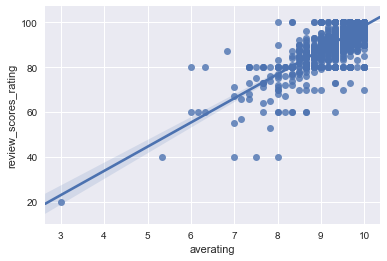

In [4]:
list2['averating'] = list2[["review_scores_checkin", "review_scores_accuracy","review_scores_communication", "review_scores_location","review_scores_value", "review_scores_cleanliness"]].mean(axis=1)
ax = sns.regplot(x="averating", y="review_scores_rating", data=list2)

<bound method DataFrame.tail of      host_response_rate  review_scores_rating
0                    96                  95.0
1                    98                  96.0
2                    67                  97.0
4                   100                  92.0
6                   100                  99.0
7                   100                  97.0
9                    98                  97.0
10                  100                  97.0
11                  100                  97.0
12                  100                  98.0
13                  100                 100.0
14                  100                  98.0
15                  100                  80.0
16                  100                  95.0
17                  100                  98.0
20                  100                 100.0
21                  100                  84.0
22                  100                 100.0
25                   67                 100.0
27                  100                  95.0
28

TypeError: No loop matching the specified signature and casting
was found for ufunc svd_n_s

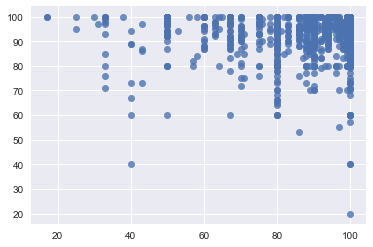

In [5]:
yy = pd.DataFrame()
yy['review_scores_rating'] = list2['review_scores_rating']
xx = pd.DataFrame()
xx['host_response_rate'] = list2['host_response_rate']
# print(math.isnan(xx['host_response_rate'][3]))
for i in xrange(xx.shape[0]):
    if isinstance(xx['host_response_rate'][i], basestring):
        xx['host_response_rate'][i] = 1.0*int(xx['host_response_rate'][i][:-1])
combine = pd.concat([xx,yy], axis=1)
combine = combine.dropna()

print(combine.tail)
ax = sns.regplot(x='host_response_rate', y="review_scores_rating", data=combine)# 

(1393570, 4)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


,neighbourhood_group,neighbourhood
0,Ballard,Adams
1,Ballard,Loyal Heights
2,Ballard,Sunset Hill
3,Ballard,West Woodland
4,Ballard,Whittier Heights
